In [1]:
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.1.0


In [3]:
# Use some functions from tensorflow_docs
# !pip install -q git+https://github.com/tensorflow/docs
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [6]:
Indianapolis_Housing = pd.read_csv("Indianapolis_Housing_Cleaned.csv")
Indianapolis_Housing.head()
Indianapolis_Housing = Indianapolis_Housing[Indianapolis_Housing.Year >= 2010]
Indianapolis_Housing = Indianapolis_Housing.drop(["Unnamed: 0", "Unnamed: 0.1", "Year", "Date",\
                                                  "Median List Price per SqFt Calculated", "Median List Price Calculated",\
                                                  "Median Market Value (Single Family)"], axis=1)
Indianapolis_Housing

,Integer_Year,Median Bedroom Price,Month,No. of Bedrooms,Zip_Code
13,15,120028.0,1,1,46220
14,16,109523.0,1,1,46220
15,17,108035.0,1,1,46220
16,18,107239.0,1,1,46220
17,19,125526.0,1,1,46220
...,...,...,...,...,...
4745,20,141884.0,12,5,46214
4746,21,153075.0,12,5,46214
4747,22,161040.0,12,5,46214
4748,23,179149.0,12,5,46214


In [17]:
#X = Indianapolis_Housing_February[["Integer_Year", "Zip_Code_Integer", "No. of Bedrooms", 
                                   #"Median Market Value (Single Family)",
                                  #"Median List Price per SqFt Calculated",
                                  #"Median List Price Calculated"]].values

#y = Indianapolis_Housing_February["Median Bedroom Price"].values
#y = y.reshape(-1, 1)
#print(X.shape, y.shape)

In [18]:
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [19]:
#X_train, X_test, y_train, y_test = train_test_split(
    #X, y, random_state=1)

In [20]:
#X_scaler = MinMaxScaler().fit(X_train)
#y_scaler = MinMaxScaler().fit(y_train)
#X_train_scaled = X_scaler.transform(X_train)
#X_test_scaled = X_scaler.transform(X_test)

In [7]:
Indianapolis_Housing['Zip_Code'] = Indianapolis_Housing['Zip_Code'].map({46220: '46220', 46219: '46219', 46227: '46227', 46214: '46214'})
Indianapolis_Housing = pd.get_dummies(Indianapolis_Housing,columns=["Zip_Code"], prefix='', prefix_sep='')

Indianapolis_Housing["No. of Bedrooms"] = Indianapolis_Housing['No. of Bedrooms'].map({1: '1 Bedroom', 2: '2 Bedroom', 3: '3 Bedroom', 4: '4 Bedroom', 5: '5 Bedroom'})
Indianapolis_Housing = pd.get_dummies(Indianapolis_Housing,columns=["No. of Bedrooms"], prefix='', prefix_sep='')

Indianapolis_Housing["Month"] = Indianapolis_Housing['Month'].map({1: 'January', 2: 'February', 3: 'March',
                                                                   4: 'April', 5: 'May', 6: 'June',
                                                                   7: 'July', 8: 'August', 9: 'September',
                                                                   10: 'October', 11: 'November', 12: 'December'})
Indianapolis_Housing = pd.get_dummies(Indianapolis_Housing,columns=["Month"], prefix='', prefix_sep='')

Indianapolis_Housing

,Integer_Year,Median Bedroom Price,46214,46219,46220,46227,1 Bedroom,2 Bedroom,3 Bedroom,4 Bedroom,...,December,February,January,July,June,March,May,November,October,September
13,15,120028.0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
14,16,109523.0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
15,17,108035.0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
16,18,107239.0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
17,19,125526.0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4745,20,141884.0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4746,21,153075.0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4747,22,161040.0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4748,23,179149.0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [8]:
Indianapolis_Housing.columns

Index(['Integer_Year', 'Median Bedroom Price', '46214', '46219', '46220',
       '46227', '1 Bedroom', '2 Bedroom', '3 Bedroom', '4 Bedroom',
       '5 Bedroom', 'April', 'August', 'December', 'February', 'January',
       'July', 'June', 'March', 'May', 'November', 'October', 'September'],
      dtype='object')

In [9]:
Indianapolis_Housing.to_csv("Indianapolis_Housing_Predictions.csv")

In [10]:
train_dataset = Indianapolis_Housing.sample(frac=0.8,random_state=0)
test_dataset = Indianapolis_Housing.drop(train_dataset.index)

In [11]:
#sns.pairplot(train_dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde")

In [12]:
train_stats = train_dataset.describe()
train_stats.pop("Median Bedroom Price")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Integer_Year,1953.0,19.615463,2.942604,15.0,17.0,20.0,22.0,25.0
46214,1953.0,0.242704,0.428827,0.0,0.0,0.0,0.0,1.0
46219,1953.0,0.248336,0.432158,0.0,0.0,0.0,0.0,1.0
46220,1953.0,0.258065,0.437682,0.0,0.0,0.0,1.0,1.0
46227,1953.0,0.250896,0.433640,0.0,0.0,0.0,1.0,1.0
1 Bedroom,1953.0,0.190988,0.393180,0.0,0.0,0.0,0.0,1.0
2 Bedroom,1953.0,0.205837,0.404416,0.0,0.0,0.0,0.0,1.0
3 Bedroom,1953.0,0.204301,0.403293,0.0,0.0,0.0,0.0,1.0
4 Bedroom,1953.0,0.198157,0.398713,0.0,0.0,0.0,0.0,1.0
5 Bedroom,1953.0,0.200717,0.400639,0.0,0.0,0.0,0.0,1.0


In [13]:
train_labels = train_dataset.pop('Median Bedroom Price')
test_labels = test_dataset.pop('Median Bedroom Price')

In [14]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [15]:
train_dataset.columns

Index(['Integer_Year', '46214', '46219', '46220', '46227', '1 Bedroom',
       '2 Bedroom', '3 Bedroom', '4 Bedroom', '5 Bedroom', 'April', 'August',
       'December', 'February', 'January', 'July', 'June', 'March', 'May',
       'November', 'October', 'September'],
      dtype='object')

In [16]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [17]:
model = build_model()

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1472      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,697
Trainable params: 5,697
Non-trainable params: 0
_________________________________________________________________


In [19]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[ 0.73911667],
       [ 0.19163184],
       [ 0.02515441],
       [ 0.25931025],
       [ 0.86789787],
       [ 0.33264688],
       [-0.17203173],
       [ 1.0114037 ],
       [ 0.14817463],
       [ 1.441835  ]], dtype=float32)

In [20]:
EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:27252605793.3521,  mae:142627.7031,  mse:27252611072.0000,  val_loss:24907602708.2967,  val_mae:137613.8750,  val_mse:24907603968.0000,  
....................................................................................................
Epoch: 100, loss:402632373.1831,  mae:15166.0166,  mse:402632416.0000,  val_loss:397141723.2532,  val_mae:15530.3623,  val_mse:397141696.0000,  
....................................................................................................
Epoch: 200, loss:198199955.4008,  mae:10197.8936,  mse:198199920.0000,  val_loss:201782968.5115,  val_mae:10742.5068,  val_mse:201782960.0000,  
....................................................................................................
Epoch: 300, loss:80961910.3201,  mae:6704.1743,  mse:80961920.0000,  val_loss:91711616.7877,  val_mae:7378.5688,  val_mse:91711608.0000,  
....................................................................................................
Epoch: 400, l

In [21]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()
#print(hist["mse"].max())

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,1.609783e+07,2828.291992,16097836.0,2.645240e+07,3676.310791,26452400.0,995
996,1.612230e+07,2828.237793,16122303.0,2.640556e+07,3667.546387,26405564.0,996
997,1.617325e+07,2820.178955,16173255.0,2.632424e+07,3705.630127,26324236.0,997
998,1.604581e+07,2824.044922,16045805.0,2.644131e+07,3668.035889,26441304.0,998
999,1.615644e+07,2824.156494,16156439.0,2.642361e+07,3663.382080,26423608.0,999


In [22]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

Text(0, 0.5, 'MAE [Median Bedroom Price]')

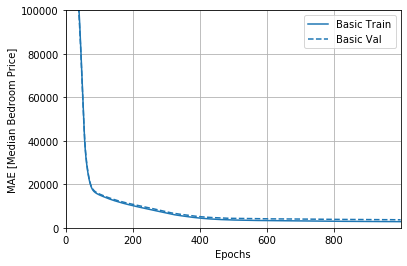

In [23]:
plotter.plot({'Basic': history}, metric = "mae")
plt.ylim([0, 100000])
plt.ylabel('MAE [Median Bedroom Price]')

Text(0, 0.5, 'MSE [Median Bedroom Price]')

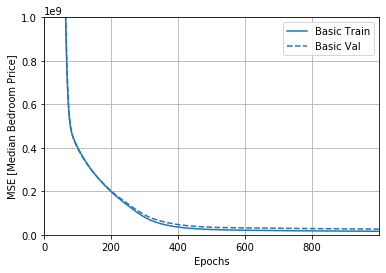

In [24]:
plotter.plot({'Basic': history}, metric = "mse")
plt.ylim([0, 1000000000])
plt.ylabel('MSE [Median Bedroom Price]')

In [25]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} ".format(mae))

488/488 - 0s - loss: 20755746.0492 - mae: 3393.7261 - mse: 20755746.0000
Testing set Mean Abs Error: 3393.73 


In [26]:
loss, mae, mse = model.evaluate(normed_train_data, train_labels, verbose=2)

print("Training set Mean Abs Error: {:5.2f} ".format(mae))

1953/1953 - 0s - loss: 17932081.9887 - mae: 2943.3923 - mse: 17932080.0000
Training set Mean Abs Error: 2943.39 


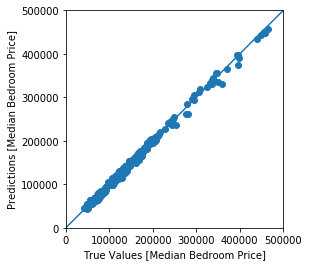

In [27]:
test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Median Bedroom Price]')
plt.ylabel('Predictions [Median Bedroom Price]')
lims = [0, 500000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [28]:
test_predictions

array([113154.43 , 110613.38 , 142740.34 , 172047.55 , 175904.77 ,
       182050.11 ,  61211.137,  63411.95 ,  95781.18 , 117628.42 ,
       107094.01 , 115984.23 , 121099.62 , 120088.57 , 118672.68 ,
       134470.77 ,  57315.316,  73292.5  ,  76663.12 , 106325.33 ,
       110545.98 , 127418.586, 162237.67 , 186194.7  , 165835.52 ,
       195105.73 , 209649.14 ,  65083.6  ,  59848.395,  58298.574,
        86429.13 ,  84336.67 ,  77857.516, 127614.64 , 122368.63 ,
       125125.4  , 183193.83 , 133543.84 , 164730.58 , 114919.48 ,
       194777.94 , 209807.05 , 305280.38 , 319579.56 ,  45288.387,
        48913.55 ,  52538.72 ,  64746.207,  63938.145,  62750.176,
        61566.445,  79897.445,  78721.016,  89119.21 , 113645.88 ,
       160868.05 , 191619.3  ,  60157.26 ,  55585.74 ,  61244.125,
        94453.73 ,  98929.49 , 104953.27 , 161810.77 , 155094.89 ,
       161619.   , 174305.39 ,  83851.56 , 102002.08 , 106581.734,
       118061.73 , 128330.93 , 158727.53 , 135231.   , 145393.

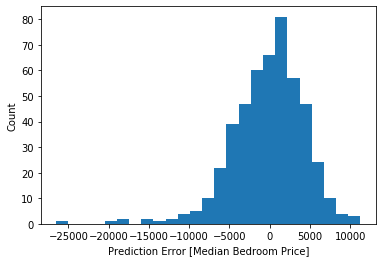

In [29]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [Median Bedroom Price]")
_ = plt.ylabel("Count")

In [5]:
# model.save("Indianapolis_Housing2.h5")
# from tensorflow.keras.models import load_model
# model = load_model("Indianapolis_Housing3.h5")

In [99]:
predictionsData = pd.read_csv("predictionsData.csv")
predictionsData = predictionsData.drop("Unnamed: 0", axis=1)

In [100]:
predictionsData = predictionsData[['Integer_Year', '46214', '46219', '46220',
       '46227', '1 Bedroom', '2 Bedroom', '3 Bedroom', '4 Bedroom',
       '5 Bedroom', 'April', 'August', 'December', 'February', 'January',
       'July', 'June', 'March', 'May', 'November', 'October', 'September']]

predictionsData.head()

,Integer_Year,46214,46219,46220,46227,1 Bedroom,2 Bedroom,3 Bedroom,4 Bedroom,5 Bedroom,...,December,February,January,July,June,March,May,November,October,September
0,25,0,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,25,0,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,25,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,25,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,25,0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [101]:
print(predictionsData.columns)
print(train_dataset.columns)

Index(['Integer_Year', '46214', '46219', '46220', '46227', '1 Bedroom',
       '2 Bedroom', '3 Bedroom', '4 Bedroom', '5 Bedroom', 'April', 'August',
       'December', 'February', 'January', 'July', 'June', 'March', 'May',
       'November', 'October', 'September'],
      dtype='object')
Index(['Integer_Year', '46214', '46219', '46220', '46227', '1 Bedroom',
       '2 Bedroom', '3 Bedroom', '4 Bedroom', '5 Bedroom', 'April', 'August',
       'December', 'February', 'January', 'July', 'June', 'March', 'May',
       'November', 'October', 'September'],
      dtype='object')


In [102]:
predictionsData.dtypes

Integer_Year    int64
46214           int64
46219           int64
46220           int64
46227           int64
1 Bedroom       int64
2 Bedroom       int64
3 Bedroom       int64
4 Bedroom       int64
5 Bedroom       int64
April           int64
August          int64
December        int64
February        int64
January         int64
July            int64
June            int64
March           int64
May             int64
November        int64
October         int64
September       int64
dtype: object

In [103]:
import numpy as np
predictionsData[['46214', '46219', '46220',
       '46227', '1 Bedroom', '2 Bedroom', '3 Bedroom', '4 Bedroom',
       '5 Bedroom', 'April', 'August', 'December', 'February', 'January',
       'July', 'June', 'March', 'May', 'November', 'October', 'September']] = predictionsData[['46214', '46219', '46220',
       '46227', '1 Bedroom', '2 Bedroom', '3 Bedroom', '4 Bedroom',
       '5 Bedroom', 'April', 'August', 'December', 'February', 'January',
       'July', 'June', 'March', 'May', 'November', 'October', 'September']].astype(np.uint8)


In [84]:
predictionsData.dtypes

Integer_Year    int64
46214           uint8
46219           uint8
46220           uint8
46227           uint8
1 Bedroom       uint8
2 Bedroom       uint8
3 Bedroom       uint8
4 Bedroom       uint8
5 Bedroom       uint8
April           uint8
August          uint8
December        uint8
February        uint8
January         uint8
July            uint8
June            uint8
March           uint8
May             uint8
November        uint8
October         uint8
September       uint8
dtype: object

In [85]:
train_dataset.dtypes

Integer_Year    int64
46214           uint8
46219           uint8
46220           uint8
46227           uint8
1 Bedroom       uint8
2 Bedroom       uint8
3 Bedroom       uint8
4 Bedroom       uint8
5 Bedroom       uint8
April           uint8
August          uint8
December        uint8
February        uint8
January         uint8
July            uint8
June            uint8
March           uint8
May             uint8
November        uint8
October         uint8
September       uint8
dtype: object

In [104]:
normed_prediction_data = norm(predictionsData)

In [105]:
normed_prediction_data.head()

,Integer_Year,46214,46219,46220,46227,1 Bedroom,2 Bedroom,3 Bedroom,4 Bedroom,5 Bedroom,...,December,February,January,July,June,March,May,November,October,September
0,1.829854,-0.565971,-0.574641,1.695148,-0.578582,2.057609,-0.508974,-0.506582,-0.496991,-0.500992,...,-0.309694,-0.314631,3.137667,-0.294562,-0.29661,-0.317569,-0.29763,-0.289401,-0.288361,-0.300676
1,1.829854,-0.565971,-0.574641,1.695148,-0.578582,-0.485752,1.963729,-0.506582,-0.496991,-0.500992,...,-0.309694,-0.314631,3.137667,-0.294562,-0.29661,-0.317569,-0.29763,-0.289401,-0.288361,-0.300676
2,1.829854,-0.565971,-0.574641,1.695148,-0.578582,-0.485752,-0.508974,1.973003,-0.496991,-0.500992,...,-0.309694,-0.314631,3.137667,-0.294562,-0.29661,-0.317569,-0.29763,-0.289401,-0.288361,-0.300676
3,1.829854,-0.565971,-0.574641,1.695148,-0.578582,-0.485752,-0.508974,-0.506582,2.011079,-0.500992,...,-0.309694,-0.314631,3.137667,-0.294562,-0.29661,-0.317569,-0.29763,-0.289401,-0.288361,-0.300676
4,1.829854,-0.565971,-0.574641,1.695148,-0.578582,-0.485752,-0.508974,-0.506582,-0.496991,1.995020,...,-0.309694,-0.314631,3.137667,-0.294562,-0.29661,-0.317569,-0.29763,-0.289401,-0.288361,-0.300676


In [106]:
test_predictions = model.predict(normed_prediction_data).flatten()

In [107]:
test_predictions

array([178223.64 , 220476.75 , 247851.7  , 342101.6  , 474625.5  ,
       180600.55 , 225089.86 , 253283.27 , 350499.88 , 474384.25 ,
       180161.62 , 221302.58 , 252239.11 , 344969.1  , 473906.16 ,
       186546.05 , 226713.08 , 254565.98 , 346729.06 , 472533.12 ,
       185658.77 , 225793.16 , 254961.39 , 350144.62 , 474878.78 ,
       186634.86 , 228830.06 , 256707.42 , 352741.12 , 473304.   ,
       188207.39 , 227881.45 , 257392.25 , 351859.47 , 478395.56 ,
       189103.31 , 231144.77 , 260436.14 , 357558.3  , 479839.38 ,
       188588.02 , 231569.56 , 258177.2  , 355123.72 , 480493.47 ,
       191881.89 , 231181.64 , 262607.88 , 357827.38 , 483643.88 ,
       190596.33 , 233197.72 , 262752.25 , 359636.44 , 479908.47 ,
       192691.86 , 234373.89 , 263605.38 , 356961.75 , 482764.25 ,
        77434.76 , 100065.75 , 129066.484, 162463.2  , 190034.64 ,
        83216.98 , 103585.086, 131940.25 , 163284.67 , 191619.3  ,
        76316.35 , 100492.29 , 130494.53 , 162954.98 , 194534.

In [90]:
# model.save("Indianapolis_Housing.h5")

In [108]:
Indianapolis_Housing = pd.read_csv("Indianapolis_Housing_Cleaned.csv")
Indianapolis_Housing = Indianapolis_Housing.drop(["Unnamed: 0", "Unnamed: 0.1"], axis=1)

In [110]:
Indianapolis_Housing = Indianapolis_Housing[Indianapolis_Housing.Integer_Year != 25]

In [111]:
Indianapolis_Housing

,Date,Integer_Year,Median Bedroom Price,Median List Price Calculated,Median List Price per SqFt Calculated,Median Market Value (Single Family),Month,No. of Bedrooms,Year,Zip_Code
0,1997-01-31,2,112900.0,125900.776510,70.844378,126400.0,1,1,1997,46220
1,1998-01-31,3,118000.0,141319.035095,66.742279,151900.0,1,1,1998,46220
2,1999-01-31,4,122400.0,141325.632469,71.362276,150600.0,1,1,1999,46220
3,2000-01-31,5,97772.0,128316.922949,45.601351,154967.0,1,1,2000,46220
4,2001-01-31,6,96466.0,132249.910303,54.573311,155566.0,1,1,2001,46220
...,...,...,...,...,...,...,...,...,...,...
4745,2015-12-31,20,141884.0,117900.000000,75.297652,119662.0,12,5,2015,46214
4746,2016-12-31,21,153075.0,128900.000000,71.947874,126031.0,12,5,2016,46214
4747,2017-12-31,22,161040.0,135000.000000,79.283366,136849.0,12,5,2017,46214
4748,2018-12-31,23,179149.0,149900.000000,91.824038,152612.0,12,5,2018,46214


In [112]:
# PredictionData = pd.read_csv("Predicted_Data_Final.csv")
# PredictionData = PredictionData.drop(["Unnamed: 0", "Unnamed: 0.1"], axis=1)
predictionsData["Median Bedroom Price"] = test_predictions
predictionsData

,Integer_Year,46214,46219,46220,46227,1 Bedroom,2 Bedroom,3 Bedroom,4 Bedroom,5 Bedroom,...,February,January,July,June,March,May,November,October,September,Median Bedroom Price
0,25,0,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,178223.640625
1,25,0,0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,220476.750000
2,25,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,247851.703125
3,25,0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,342101.593750
4,25,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,474625.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,25,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,101842.210938
236,25,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,124973.539062
237,25,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,172430.234375
238,25,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,199679.343750


In [113]:
predictionsData.to_csv("Predicted_Data.csv")

Run "UnDummied.ipynb" here

In [115]:
predictionsData = pd.read_csv("Predicted_Data_Final.csv")

In [116]:
Data_Machine = pd.concat([Indianapolis_Housing, predictionsData])

In [117]:
# Indianapolis_Housing['Zip_Code'] = Indianapolis_Housing['Zip_Code'].map({46220: '46220', 46219: '46219', 46227: '46227', 46214: '46214'})
# Indianapolis_Housing["No. of Bedrooms"] = Indianapolis_Housing['No. of Bedrooms'].map({1: '1 Bedroom', 2: '2 Bedroom', 3: '3 Bedroom', 4: '4 Bedroom', 5: '5 Bedroom'})

# Indianapolis_Housing["Month"] = Indianapolis_Housing['Month'].map({1: 'January', 2: 'February', 3: 'March',
#                                                                    4: 'April', 5: 'May', 6: 'June',
#                                                                    7: 'July', 8: 'August', 9: 'September',
#                                                                    10: 'October', 11: 'November', 12: 'December'})
Data_Machine

,Date,Integer_Year,Median Bedroom Price,Median List Price Calculated,Median List Price per SqFt Calculated,Median Market Value (Single Family),Month,No. of Bedrooms,Year,Zip_Code,Unnamed: 0,Unnamed: 0.1
0,1997-01-31,2,112900.00,125900.776510,70.844378,126400.0,1,1,1997.0,46220,NaN,NaN
1,1998-01-31,3,118000.00,141319.035095,66.742279,151900.0,1,1,1998.0,46220,NaN,NaN
2,1999-01-31,4,122400.00,141325.632469,71.362276,150600.0,1,1,1999.0,46220,NaN,NaN
3,2000-01-31,5,97772.00,128316.922949,45.601351,154967.0,1,1,2000.0,46220,NaN,NaN
4,2001-01-31,6,96466.00,132249.910303,54.573311,155566.0,1,1,2001.0,46220,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
235,NaN,25,199679.34,NaN,NaN,NaN,12,4,NaN,46227,238.0,238.0
236,NaN,25,206903.75,NaN,NaN,NaN,12,5,NaN,46214,179.0,179.0
237,NaN,25,204817.40,NaN,NaN,NaN,12,5,NaN,46219,119.0,119.0
238,NaN,25,482764.25,NaN,NaN,NaN,12,5,NaN,46220,59.0,59.0


In [118]:
# MonthFrame = PredictionData[["Integer_Year", "January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December", "Median Bedroom Price"]]
# MonthFrame

In [119]:
Data_Machine.to_csv("Data_Machine.csv")

Correct Year in Data_Machine

In [120]:
Data_Machine = pd.read_csv("Data_Machine.csv")
Data_Machine.tail()

,Unnamed: 0,Date,Integer_Year,Median Bedroom Price,Median List Price Calculated,Median List Price per SqFt Calculated,Median Market Value (Single Family),Month,No. of Bedrooms,Year,Zip_Code,Unnamed: 0.1,Unnamed: 0.1.1
4935,235,NaN,25,199679.34,NaN,NaN,NaN,12,4,2020,46227,238.0,238.0
4936,236,NaN,25,206903.75,NaN,NaN,NaN,12,5,2020,46214,179.0,179.0
4937,237,NaN,25,204817.40,NaN,NaN,NaN,12,5,2020,46219,119.0,119.0
4938,238,NaN,25,482764.25,NaN,NaN,NaN,12,5,2020,46220,59.0,59.0
4939,239,NaN,25,223116.60,NaN,NaN,NaN,12,5,2020,46227,239.0,239.0


In [123]:
Data_Machine["Date"] = pd.to_datetime(Data_Machine.Year*10000+Data_Machine.Month*100+28,format='%Y%m%d')
Data_Machine = Data_Machine.drop(["Unnamed: 0", "Unnamed: 0.1", \
                                                  "Median List Price per SqFt Calculated", "Median List Price Calculated",\
                                                  "Median Market Value (Single Family)"], axis=1)
Data_Machine

,Date,Integer_Year,Median Bedroom Price,Month,No. of Bedrooms,Year,Zip_Code,Unnamed: 0.1.1
4935,2020-12-28,25,199679.34,12,4,2020,46227,238.0
4936,2020-12-28,25,206903.75,12,5,2020,46214,179.0
4937,2020-12-28,25,204817.40,12,5,2020,46219,119.0
4938,2020-12-28,25,482764.25,12,5,2020,46220,59.0
4939,2020-12-28,25,223116.60,12,5,2020,46227,239.0


In [126]:
Data_Machine = Data_Machine.drop(["Unnamed: 0.1.1"], axis=1)
Data_Machine

,Date,Integer_Year,Median Bedroom Price,Month,No. of Bedrooms,Year,Zip_Code
0,1997-01-28,2,112900.00,1,1,1997,46220
1,1998-01-28,3,118000.00,1,1,1998,46220
2,1999-01-28,4,122400.00,1,1,1999,46220
3,2000-01-28,5,97772.00,1,1,2000,46220
4,2001-01-28,6,96466.00,1,1,2001,46220
...,...,...,...,...,...,...,...
4935,2020-12-28,25,199679.34,12,4,2020,46227
4936,2020-12-28,25,206903.75,12,5,2020,46214
4937,2020-12-28,25,204817.40,12,5,2020,46219
4938,2020-12-28,25,482764.25,12,5,2020,46220


In [127]:
Data_Machine.to_csv("Data_Machine.csv")

In [128]:
model.save("Indianapolis_Housing3.h5")